<a href="https://colab.research.google.com/github/A-sy-coding/ML-Class/blob/master/card1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',family='MalGun Gothic')
mpl.rc('axes',unicode_minus = False)

In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/card')

In [ ]:
# 데이터 불러오기
card = pd.read_csv('train.csv')
card_test = pd.read_csv('test.csv')

* child_num

In [ ]:
# 3보다 큰 값들을 3으로 지정
card.loc[card['child_num']>3,'child_num'] = 3

# 결과 확인
card['child_num'].value_counts()

###########################################
# test data 전처리

# 3보다 큰 값들을 3으로 지정
card_test.loc[card_test['child_num']>3,'child_num'] = 3

* family_size

In [ ]:
# 4보다 큰 값들을 4로 지정한다.
card.loc[card['family_size'] >4,'family_size'] = 4

# 변경 결과 확인
card['family_size'].value_counts()

###########################################
# test data 전처리

# 4보다 큰 값들을 4로 지정한다.
card_test.loc[card_test['family_size'] >4,'family_size'] = 4

* 문자형 변수만 추려내고 인코딩하기

In [ ]:
train = card
train = train.drop(['index'], axis=1)
train.fillna('NAN', inplace=True) 


test = card_test
test = test.drop(['index'], axis=1)
test.fillna('NAN', inplace=True)

object_col = []
for col in train.columns:
    if train[col].dtype == 'object':
        object_col.append(col)

object_col

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

In [ ]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder()
enc.fit(train.loc[:,object_col])


train_onehot_df = pd.DataFrame(enc.transform(train.loc[:,object_col]).toarray(), 
             columns=enc.get_feature_names(object_col))
train.drop(object_col, axis=1, inplace=True)
train = pd.concat([train, train_onehot_df], axis=1)

train.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_onehot_df = pd.DataFrame(enc.transform(test.loc[:,object_col]).toarray(), 
             columns=enc.get_feature_names(object_col))
test.drop(object_col, axis=1, inplace=True)
test = pd.concat([test, test_onehot_df], axis=1)

* income 구간화 하기

In [ ]:
# income_total을 구간화 하기 위해서 각 값의 사분위 비율을 구해본다.
q_min = train['income_total'].describe()['min']
q1 = train['income_total'].describe()['25%']
q2 = train['income_total'].describe()['50%']
q3 = train['income_total'].describe()['75%']
q_max = train['income_total'].describe()['max']

#####################################################
# test data 전처리 

# income_total을 구간화 하기 위해서 각 값의 사분위 비율을 구해본다.
q_min_test = test['income_total'].describe()['min']
q1_test = test['income_total'].describe()['25%']
q2_test = test['income_total'].describe()['50%']
q3_test = test['income_total'].describe()['75%']
q_max_test = test['income_total'].describe()['max']

In [ ]:
# 구간 지정하기
bins = [q_min,q1,q2,q3,q_max]

############################################
# 구간을 나누어 주는 함수 만들기
def get_category(array,bins):
    category = pd.cut(array,bins = bins,include_lowest=True, labels= [i for i in range(1,len(bins))])
    return category
############################################

# 구간 변경한 값들을 새로운 변수로 추가하기
train['income_total'] = get_category(train['income_total'],bins)


######################################################
# test data 전처리
bins_test = [q_min_test,q1_test,q2_test,q3_test,q_max_test]
test['income_total'] = get_category(test['income_total'],bins_test)

In [ ]:
# DAYS_BIRTH-> 카드 발급일로부터의 출생일
train['DAYS_BIRTH'] 

########################
# 출생일을 이용해 나이 추출

train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'] ) # 양수로 변환

# 일년은 365일이고 일수를 365일로 나누어 몫을 구하면 년수를 구할 수 있다. --> 이때 년수는 나이가 될 수 있다.
train['DAYS_BIRTH'] = train['DAYS_BIRTH'] // 365

# 각 나이를 범주화 시키기
# 20대 미만, 20대, 30대, 40대, 50대, 60대 이상

# # 나이별로 범주형으로 변환시키는 함수 구현
# def get_age_category(array):
    
#     array.loc[array < 20,] = 1
#     array.loc[(array >= 20) & (array < 30) , ] = 2
#     array.loc[(array >= 30) & (array < 40) , ] = 3
#     array.loc[(array >= 40) & (array < 50) , ] = 4
#     array.loc[(array >= 50) & (array < 60) , ] = 5
#     array.loc[array >= 60 , ] = 6

# # 새로운 변수 생성
# train['age_category'] = train['age']

# # 함수 적용
# get_age_category(train['age_category'])

# # 변형 확인
# train[['age','age_category']].head()


#######################################################
# test data  적용

test['DAYS_BIRTH'] = abs(test['DAYS_BIRTH'] ) # 양수로 변환

# 일년은 365일이고 일수를 365일로 나누어 몫을 구하면 년수를 구할 수 있다. --> 이때 년수는 나이가 될 수 있다.
test['DAYS_BIRTH'] = test['DAYS_BIRTH'] // 365

# # 새로운 변수 생성
# test['age_category'] = test['age']

# # 함수 적용
# get_age_category(test['age_category'])

In [ ]:
# 월별을 일자로 변경
train['begin_month'] = train['begin_month'] * 30

In [ ]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(train, train['credit']):
    folds.append((train_idx, valid_idx))

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

lgb_models={}
for fold in range(5):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = train.drop(['credit'],axis=1).iloc[train_idx].values, train.drop(['credit'],axis=1).iloc[valid_idx].values,\
                                         train['credit'][train_idx].values, train['credit'][valid_idx].values 
    lgb = LGBMClassifier(n_estimators = 700)
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=30,
           verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 30 rounds.
[100]	training's multi_logloss: 0.678066	valid_1's multi_logloss: 0.759227
[200]	training's multi_logloss: 0.603368	valid_1's multi_logloss: 0.741443
[300]	training's multi_logloss: 0.546648	valid_1's multi_logloss: 0.734253
[400]	training's multi_logloss: 0.502516	valid_1's multi_logloss: 0.729855
Early stopping, best iteration is:
[429]	training's multi_logloss: 0.490845	valid_1's multi_logloss: 0.728968


====================================2============================================
Training until validation scores don't improve for 30 rounds.
[100]	training's multi_logloss: 0.676486	valid_1's multi_logloss: 0.770339
[200]	training's multi_logloss: 0.60253	valid_1's multi_logloss: 0.752684
[300]	training's multi_logloss: 0.546824	valid_1's multi_logloss: 0.747504
[400]	training's multi_logloss: 0.501596	valid_1's multi_logloss: 0.74451
Ea

In [ ]:
submit = pd.read_csv('submission.csv')
submit.iloc[:,1:]=0
for fold in range(5):
    submit.iloc[:,1:] += lgb_models[fold].predict_proba(test)/5

In [ ]:
submit

,Unnamed: 0,0,1,2
0,0,0.123881,0.875944,0.000175
1,1,0.190004,0.809887,0.000108
2,2,0.110480,0.888019,0.001501
3,3,0.164055,0.835483,0.000462
4,4,0.036846,0.963081,0.000072
...,...,...,...,...
9995,9995,0.102143,0.897810,0.000047
9996,9996,0.226820,0.773124,0.000057
9997,9997,0.024663,0.974722,0.000615
9998,9998,0.215760,0.784167,0.000073


In [ ]:
submit.to_csv('submission2.csv')

# 파생변수를 추가한 후 결과 확인해보기

In [ ]:
# 데이터 불러오기
card = pd.read_csv('train.csv')
card_test = pd.read_csv('test.csv')

In [ ]:
train = card
test = card_test

In [ ]:
# 결측치 처리

train.fillna('NaN', inplace=True) 
test.fillna('NaN', inplace=True)

In [ ]:
# 이상치 처리

train = train[(train['family_size'] <= 7)]
train = train.reset_index(drop=True)

In [ ]:
# 의미 없는 변수 제거
train.drop(['index','FLAG_MOBIL'],axis=1,inplace=True)
test.drop(['index','FLAG_MOBIL'],axis=1,inplace=True)

In [ ]:
# dats_employ의 경우는 무직자(양수)를 0으로 취급한다.
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)

In [ ]:
# 음수값을 양수값으로 변경

names =  ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']

for name in names:
  train[name] = np.abs(train[name])
  test[name] = np.abs(test[name])

* 파생변수 추가하기

In [ ]:
# 1. 고용되기 전 일수  --> 태어난 일수에 고용된 일수를 빼면 고용되기 전 일수가 나온다.
# 2. 해당년도의 고용되기 전까지의 개월 --> 해당년도 월 - 해당년도 월 초를 빼면 해당 년도에서 고용되기 전까지의 개월 수가 나온다.
# 3. 해당년도의 고용되기 전까지의 주   --> 해당년도 주 - 해당년도를 빼면 해당 년도에서 고용되기 전까지의 주 수가 나온다.
# 4. 각 일의 평균소득 --> 소득 / 살아온 일수
# 5. 인당 평균소득 --> 소득 / 가족수

In [ ]:
# 파생변수를 만드는 함수 
def add_variable(df):
  # 1. 고용되기 전 일수  --> 태어난 일수에 고용된 일수를 빼면 고용되기 전 일수가 나온다.
  df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
  
  # 2. 해당년도의 고용되기 전까지의 개월 --> 해당년도 월 - 해당년도 월 초를 빼면 해당 년도에서 고용되기 전까지의 개월 수가 나온다.
  df['before_EMPLOYED_m'] = df['before_EMPLOYED'] // 30 - df['before_EMPLOYED'] //30 // 12 * 12 
  
  # 3. 해당년도의 고용되기 전까지의 주   --> 해당년도 주 - 해당년도를 빼면 해당 년도에서 고용되기 전까지의 주 수가 나온다.
  df['before_EMPLOYED_w'] = df['before_EMPLOYED'] // 7 - df['before_EMPLOYED'] // 7 // 4 * 4

  # 4. 각 일의 평균소득 --> 소득 / 살아온 일수
  df['ability'] = df['income_total'] / df['DAYS_BIRTH']
  
  # 5. 인당 평균소득 --> 소득 / 가족수
  df['income_mean'] = df['income_total'] / df['family_size']

  # 6. 중복 데이터를 방지하기 위해 begin_month를 제외한 모든 변수들을 하나의 문자로 합치기
  df['ID'] = \
  df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
  df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
  df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
  df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
  df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
  df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
  df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
  df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

# 함수 적용하기!!
add_variable(train)
add_variable(test)

In [ ]:
for df in [train,test]:
    # before_EMPLOYED: 고용되기 전까지의 일수
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    df['income_total_befofeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']
    df['before_EMPLOYED_m'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)
    df['before_EMPLOYED_w'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)
    
    
    #DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))  
    df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
    df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
    df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

    #ability: 소득/(살아온 일수+ 근무일수)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
    
    #income_mean: 소득/ 가족 수
    df['income_mean'] = df['income_total'] / df['family_size']
    
    #ID 생성: 각 컬럼의 값들을 더해서 고유한 사람을 파악(*한 사람이 여러 개 카드를 만들 가능성을 고려해 begin_month는 제외함)
    df['ID'] = \
    df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
    df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
    df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
    df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
    df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
    df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,before_EMPLOYED,income_total_befofeEMP_ratio,before_EMPLOYED_m,before_EMPLOYED_w,EMPLOYED,DAYS_EMPLOYED_m,DAYS_EMPLOYED_w,ability,income_mean,ID
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,9190,22.034820,6.0,0.0,12,0.0,0.0,10.882416,101250.0,0_202500.0_13899_4709_0_0_0_2.0_F_N_N_Commerci...
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,9840,25.152439,4.0,1.0,4,3.0,0.0,19.156347,82500.0,1_247500.0_11380_1540_0_0_1_3.0_F_N_Y_Commerci...
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,14653,30.710435,8.0,1.0,12,3.0,1.0,19.131840,225000.0,0_450000.0_19087_4434_0_1_0_2.0_M_Y_Y_Working_...
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,12996,15.581717,1.0,0.0,5,9.0,2.0,11.786962,101250.0,0_202500.0_15088_2092_0_1_0_2.0_F_N_Y_Commerci...
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,12932,12.179091,11.0,3.0,5,10.0,0.0,9.187959,78750.0,0_157500.0_15037_2105_0_0_0_2.0_F_Y_Y_State se...


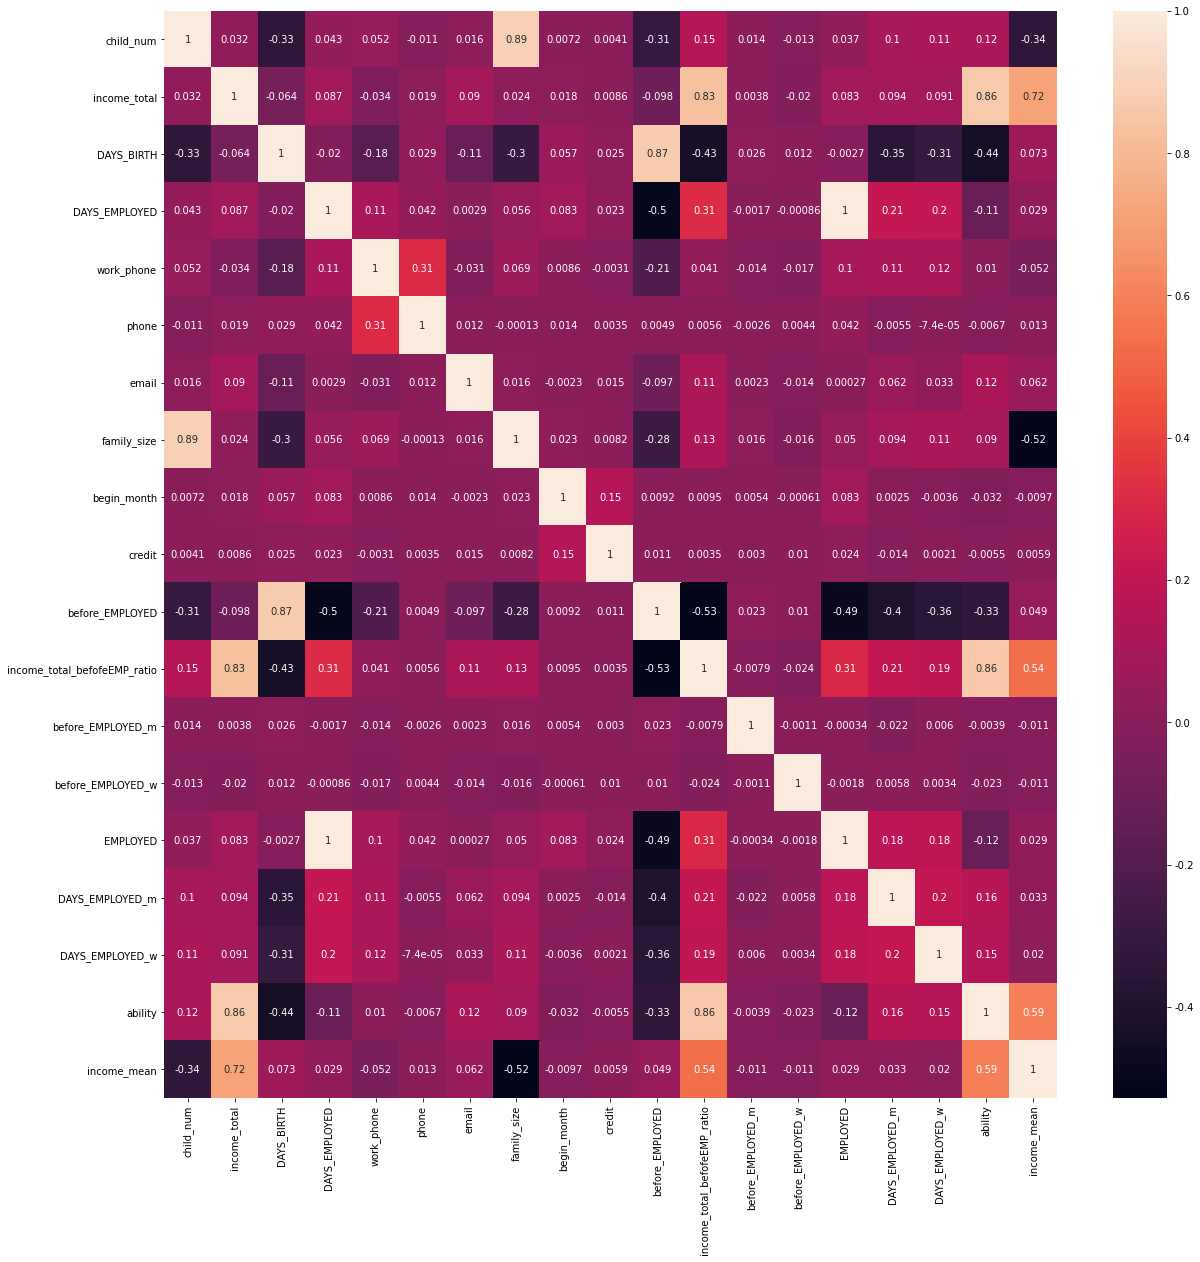

In [ ]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리

plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [ ]:
# 다중공산성이 존재하는 변수 제거하기
cols = ['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED',]
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

In [ ]:
# income_total은 로그 스케일링을 해준다.
for df in [train,test]:
    df['income_total'] = np.log1p(1+df['income_total'])

In [ ]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  15
Number of Categorical features:  9


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# 원하는 열만 인코딩하는 함수 만들기
def change_label(variable,names):
    
    for i in names:
        variable[i] = encoder.fit_transform(variable[i])

# 함수 적용하기
change_label(train,categorical_feats)
change_label(test,categorical_feats)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder


# enc = OneHotEncoder()
# enc.fit(train.loc[:,categorical_feats])


# train_onehot_df = pd.DataFrame(enc.transform(train.loc[:,categorical_feats]).toarray(), 
#              columns=enc.get_feature_names(categorical_feats))
# train.drop(categorical_feats, axis=1, inplace=True)
# train = pd.concat([train, train_onehot_df], axis=1)

# train.head()

In [ ]:
# from sklearn.cluster import KMeans

# kmeans_train = train.drop(['credit'], axis=1)
# kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
# train['cluster'] = kmeans.predict(kmeans_train)
# test['cluster'] = kmeans.predict(test)

In [ ]:
# 스케일링 하기
from sklearn.preprocessing import StandardScaler

numerical_feats.remove('income_total')
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from tensorflow.keras.utils import to_categorical

X = train.drop(['credit'],axis=1)
y = train['credit']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

lgbm = LGBMClassifier(n_estimators = 700)
lgbm.fit(X_train,y_train)

y_pred = lgbm.predict_proba(X_test)
y_pred_final = lgbm.predict(X_test)
y_category = to_categorical(y_test)

log_loss(y_category,y_pred)

0.7275164325748544

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_final)

array([[ 126,   98,  420],
       [  31,  494,  729],
       [  67,  175, 3151]])

In [ ]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=700, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate' : [0.001, 0.01, 0.1, 10], 'max_depth' : [5,10,15,30], 'n_estimators' : [500, 700, 1000]}

lgbm = LGBMClassifier()

grid = GridSearchCV(lgbm, params, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 10],
                         'ma

In [ ]:
grid.best_estimator_
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500}

In [ ]:
lgbm = LGBMClassifier(n_estimators = 500,max_depth=15)
lgbm.fit(X_train,y_train)

y_pred = lgbm.predict_proba(X_test)
y_category = to_categorical(y_test)

log_loss(y_category,y_pred)

0.7349768358004215

In [ ]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(train, train['credit']):
    folds.append((train_idx, valid_idx))

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

lgb_models={}
for fold in range(5):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = train.drop(['credit'],axis=1).iloc[train_idx].values, train.drop(['credit'],axis=1).iloc[valid_idx].values,\
                                         train['credit'][train_idx].values, train['credit'][valid_idx].values 
    lgb = LGBMClassifier(n_estimators = 700, max_depth=15)
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=30,
           verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 30 rounds.
[100]	training's multi_logloss: 0.648483	valid_1's multi_logloss: 0.746364
[200]	training's multi_logloss: 0.564165	valid_1's multi_logloss: 0.725573
[300]	training's multi_logloss: 0.501891	valid_1's multi_logloss: 0.718355
Early stopping, best iteration is:
[365]	training's multi_logloss: 0.469233	valid_1's multi_logloss: 0.71607


====================================2============================================
Training until validation scores don't improve for 30 rounds.
[100]	training's multi_logloss: 0.650272	valid_1's multi_logloss: 0.750319
[200]	training's multi_logloss: 0.564858	valid_1's multi_logloss: 0.728786
[300]	training's multi_logloss: 0.501911	valid_1's multi_logloss: 0.719238
Early stopping, best iteration is:
[353]	training's multi_logloss: 0.47527	valid_1's multi_logloss: 0.717862


====================================3===

In [ ]:
# 결과를 저장할 배열 생성하기
x = np.zeros(shape=(test.shape[0],3))

# 위에서 저장한 모델을 사용하여 예측값 출력하기
for fold in range(5):
    x += lgb_models[fold].predict_proba(test)/5

x.shape

(10000, 3)

# cat boost 사용하기

In [ ]:
# catboost 다운받기
!pip install catboost

     |████████████████████████████████| 67.3MB 67kB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

X = train.drop('credit', axis=1)
y = train['credit']
X_test = test

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], 3))
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']

cat_boost_models = {}

for fold in range(n_fold):
  print(f'\n----------------- Fold {fold} -----------------\n')
  train_idx, valid_idx = folds[fold]
  X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
  train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
  valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

  model_cat = CatBoostClassifier()
  model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
  cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
  cat_boost_models[fold] = model_cat


----------------- Fold 0 -----------------

Learning rate set to 0.114773
0:	learn: 1.0350819	test: 1.0345586	best: 1.0345586 (0)	total: 124ms	remaining: 2m 3s
100:	learn: 0.7128860	test: 0.6747054	best: 0.6745678 (96)	total: 9.65s	remaining: 1m 25s
200:	learn: 0.6914992	test: 0.6740919	best: 0.6738423 (174)	total: 20.4s	remaining: 1m 21s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6738423488
bestIteration = 174

Shrink model to first 175 iterations.

----------------- Fold 1 -----------------

Learning rate set to 0.114773
0:	learn: 1.0347950	test: 1.0352163	best: 1.0352163 (0)	total: 128ms	remaining: 2m 7s
100:	learn: 0.7141995	test: 0.6800753	best: 0.6800680 (97)	total: 9.35s	remaining: 1m 23s
200:	learn: 0.6937751	test: 0.6772508	best: 0.6772508 (200)	total: 20s	remaining: 1m 19s
300:	learn: 0.6754971	test: 0.6766904	best: 0.6762141 (228)	total: 30.6s	remaining: 1m 10s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6762141006
bestIter

In [ ]:
# 결과를 저장할 배열 생성하기
x = np.zeros(shape=(test.shape[0],3))

# 위에서 저장한 모델을 사용하여 예측값 출력하기
for fold in range(5):
    x += cat_boost_models[fold].predict_proba(X_test)/5

x = pd.DataFrame(x)
x.head()

,0,1,2
0,0.051605,0.086480,0.861915
1,0.072167,0.186200,0.741633
2,0.041740,0.085255,0.873005
3,0.076186,0.100738,0.823076
4,0.093832,0.390385,0.515783


In [ ]:
result = pd.DataFrame(x)

result.to_csv('submission2.csv')